# Part 1

# In this part of my project I will use basic machine learning models to predict forest cover type based on cartographic variables

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
data = pd.read_csv('cover_data.csv')
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [6]:
x = data.iloc[:, 0:-1]
y = data['class']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = .2, random_state = 10)

In [8]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('numeric',StandardScaler(), x.columns)])

In [9]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [14]:
logistic_model = LogisticRegression(multi_class="multinomial",max_iter=5000).fit(X_train, Y_train)
logistic_predictions = logistic_model.predict(X_test)

logistic_model.score(X_test,Y_test)

0.7266163524177517

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, logistic_predictions))

              precision    recall  f1-score   support

           1       0.72      0.70      0.71     42631
           2       0.75      0.80      0.77     56420
           3       0.68      0.81      0.74      7205
           4       0.62      0.43      0.51       529
           5       0.17      0.01      0.01      1940
           6       0.51      0.28      0.36      3415
           7       0.72      0.58      0.64      4063

    accuracy                           0.73    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.73      0.72    116203



In [16]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
tree_predictions = classifier.predict(X_test)
classifier.score(X_test,Y_test)

0.9401306334604098

In [17]:
print(classification_report(Y_test, tree_predictions))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42631
           2       0.95      0.95      0.95     56420
           3       0.93      0.93      0.93      7205
           4       0.82      0.83      0.82       529
           5       0.83      0.83      0.83      1940
           6       0.88      0.88      0.88      3415
           7       0.94      0.94      0.94      4063

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



In [18]:
k_classifier = KNeighborsClassifier(n_neighbors = 5)
k_classifier.fit(X_train, Y_train)
k_predictions = k_classifier.predict(X_test)
k_classifier.score(X_test,Y_test)

0.9283495262600794

In [20]:
print(classification_report(Y_test, k_predictions))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93     42631
           2       0.94      0.95      0.94     56420
           3       0.90      0.91      0.90      7205
           4       0.84      0.75      0.79       529
           5       0.84      0.78      0.81      1940
           6       0.82      0.80      0.81      3415
           7       0.95      0.93      0.94      4063

    accuracy                           0.93    116203
   macro avg       0.89      0.86      0.88    116203
weighted avg       0.93      0.93      0.93    116203



In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
forest_predictions = forest.predict(X_test)
forest.score(X_test,Y_test)

0.9562489780814609

In [24]:
print(classification_report(Y_test, forest_predictions))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96     42631
           2       0.95      0.97      0.96     56420
           3       0.94      0.96      0.95      7205
           4       0.92      0.87      0.89       529
           5       0.94      0.78      0.85      1940
           6       0.93      0.90      0.91      3415
           7       0.97      0.95      0.96      4063

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



In [13]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [16]:
params = {
    "loss" : ["squared_hinge", "modified_huber"],
    "alpha" : [0.1],
    "penalty" : ["l2", "l1", "none"],
}

clf = SGDClassifier(max_iter=500)
grid = GridSearchCV(clf, param_grid=params, cv=3, verbose =1)


grid.fit(X_train, Y_train)

print(grid.best_params_) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\noahb\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noahb\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noahb\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noahb\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\noa

{'alpha': 0.1, 'loss': 'modified_huber', 'penalty': 'none'}


C:\Users\noahb\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


# The Grid Search determined that the best parameters for my Stochastic Gradient Descent Model are an alpha of .1 using modified huber for loss and no penalty. 
### I had to limit the amount of iterations due to lack of computational power.

### Do to lack of computational power, I cannot run the cell below.The condensed version is above.

In [ ]:
params = {
    "loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10, verbose =3)


grid.fit(X_train, Y_train)

print(grid.best_params_) 

# I will now train the Stochastic Gradient Descent Model using my new parameters and increased iterations

In [20]:
SGD = SGDClassifier(max_iter=1000, alpha = 0.1, loss = 'modified_huber', penalty = 'none')

SGD.fit(X_train, Y_train)

SGD_predictions = SGD.predict(X_test)
SGD.score(X_test,Y_test)

0.7098784024508834

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, SGD_predictions))

              precision    recall  f1-score   support

           1       0.71      0.69      0.70     42631
           2       0.74      0.79      0.76     56420
           3       0.64      0.75      0.69      7205
           4       0.23      0.24      0.24       529
           5       0.19      0.06      0.10      1940
           6       0.41      0.18      0.24      3415
           7       0.70      0.53      0.60      4063

    accuracy                           0.71    116203
   macro avg       0.52      0.46      0.48    116203
weighted avg       0.70      0.71      0.70    116203



## The Random Forest Model preforms best with an accuracy of 96%. The K-Means Classifier also preforms well with an accuracy of 93%.

### Below is a confusion matrix for the Random Forest predictions.
#### The diagonal is the correctly predicted labels

In [13]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

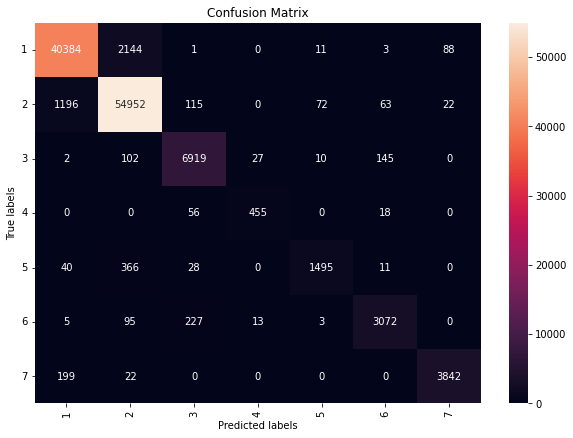

In [14]:
confusion = confusion_matrix(Y_test, forest_predictions)
labels = forest.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax, fmt="d");

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels);

# Conclusion: 
## I successfully created and tested basic machine learning models that predict forest cover type. I found that a Random Forest model will perform best and obtain an accuracy of around 96%. These results are very good considering that randomly guessing one of the seven categories would result in an accuracy around only 14%.

# Next Steps:
## In Part 2 of my project I will use deep learning neural network models to see if I can better predict forest cover type.